# Problem Set 2
Designed by Kun He, with help from Kate Saenko.
Programming part adapted from [Stanford CS231n](http://cs231n.stanford.edu/).

## Preamble
- By now you should have a working Python installation. If not, refer to the instructions in problem set 1.
- Clone or download this git repository, which contains the `cs591s2` codebase.
- The code for loading the MNIST dataset requires the `scikit-learn` package. If you previously did the Anaconda installation to set up your Python environment (see problem set 1), you should already have it. Otherwise, you can install it following the instructions here: http://scikit-learn.org/stable/install.html
- Be sure to show **all your steps** in derivations!

## Problem 1: Cross-Entropy and Softmax
This problem asks you to derive the cross-entropy loss for a multiclass classification problem using maximum likelihood.
Consider the multiclass classification problem in which each input is assigned to one of $K$ __mutually exclusive__ classes. The binary target variables $y_k$ ∈ {0, 1} have a "one-hot" coding scheme, where the value is 1 for the indicated class and 0 for all others. Assume that we can interpret the network outputs as $h_k(x,\theta) = p(y_k = 1|x)$, or the probability of the kth class.

**Q1.1**: Show that the maximum likelihood estimate of the parameters $\theta$ can be obtained by minimizing the multiclass **cross-entropy** loss function 
<p>
$L(\theta)= - \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$
</p>
<p>
where $N$ is the number of examples $\{x_i,y_i\}$. </p>

Since classes are mutually exclusive:

$$\theta_{MLE} = argmax \prod_{k=1}^{K}p(y_k|x,\theta)$$
$$= argmax \sum_{k=1}^{K}\log p(y_k|x,\theta)$$
$$= argmin -\sum_{k=1}^{K}\log p(y_k|x,\theta)$$
$$= argmin - \frac{1}{N} \sum_{k=1}^{K}\log p(y_k|x,\theta)$$

Since it is multinoulli distribution:

$$ L(\theta)=-\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^{K}\log p(y_k|x_i,\theta)$$
$$= -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^{K} \log (h_k(x_i,\theta)^{y_{ik}})$$

__I cannot think about a proper mathmetical way to prove this, so here is a 'common sense' way to prove it__

Due to the one-hot scheme, ie loss =$1_{\{y_{truth} \neq y_{predicted}\}}$, which means $\sum_{k=1}^{K}\log p(y_k|x_i,\theta) = \sum_{k=1}^{K} \log(h_k(x_i,\theta)^{y_{ik}})= \sum_{k=1}^{K}y_{ik} \log(h_k(x_i,\theta))$.

For example, if there are three classes and the ground truth is class 1, and system outputs $h_1(x_i,\theta) =0.2$, $h_2(x_i,\theta) =0.2$ and $h_3(x_i,\theta) =0.6$. The logloss $=-1*log(0.2)-0*log(0.2)-0*log(0.6)=-log(0.2)$。 Therefore：

$$L(\theta)= - \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$$

$$$$

$$$$

**Q1.2**: Assume the penultimate layer outputs raw scores (called logits) for each class $z_k(x,\theta)$ for input $x$. Then the class probabilities can be obtained using **softmax** with **temperature parameter $T>0$**, i.e. 
<p>
$h_k(x,\theta)=\frac{\exp(z_k(x,\theta)/T)}{\sum_{j}exp(z_j(x,\theta)/T)}$. 
</p> 

Consider a single pair $(x,y)$ where $y$ is a one-hot vector, and the corresponding loss $L=-\sum_{k}y_k\log h_k(x,\theta)$. Compute the partial derivative $\frac{\partial L}{\partial z_k(x,\theta)}$. 

<p>
Hint: with the standard softmax ($T=1$) it is known that
$\frac{\partial L}{\partial z_k(x,\theta)}=h_k(x,\theta)-y_{k}$.
</p>

### I found the nameology is a bit confusing, so I use $y_t$ represent the ground truth class.

First, since there is __only one ground truth (one-hot coding scheme)__, let's say the ground truth is __t__, therefore
$$y_t =1$$ $$y_i = 0, i \in K, i\neq t$$

__For k = t__:
$$\frac{\partial}{\partial z_k(x,\theta)}h_k(x,\theta)) = \frac{\partial}{\partial z_t(x,\theta)}h_k(x,\theta)$$

$$= \frac{d(exp(z_t(x,\theta)/T)}{d(z_t(x,\theta))}  \frac{1}{\sum_{j}exp(z_j(x,\theta)/T)} + 
\frac{d\frac{1}{\sum_{j}exp(z_j(x,\theta)/T)}}{d(z_t(x,\theta))}exp(z_t(x,\theta))$$

$$=\frac{1}{T}\frac{\exp(z_k(x,\theta)/T)}{\sum_{j}exp(z_j(x,\theta)/T)} - \frac{1}{T} \Big(\frac{1}{\sum_{j}exp(z_j(x,\theta)/T)}\Big)^2 exp(z_t(x,\theta)/T) exp(z_t(x,\theta)/T)$$

$$= \frac{1}{T}h_t(x,\theta) (1- h_t(x,\theta))$$

__For k $\neq$ t__:
$$\frac{\partial}{\partial z_k(x,\theta)}h_k(x,\theta)  = \frac{d\frac{1}{\sum_{j}exp(z_j(x,\theta)/T)}}{d(z_k(x,\theta))} exp(z_t(x,\theta))$$

$$= -\frac{1}{T} \Big(\frac{1}{\sum_{j}exp(z_j(x,\theta)/T)}\Big)^2 exp(z_k(x,\theta)/T) exp(z_t(x,\theta)/T)$$

$$= - \frac{1}{T} h_k(x,\theta) h_t(x,\theta)$$

Therefore, we can use __delta function__ to represent these two situations:
$$\frac{\partial}{\partial z_k(x,\theta)}h_k(x,\theta) = \frac{1}{T} h_k(x,\theta)\Big(\delta_{kt}-h_k(x,\theta)\Big)$$
$$ \delta_{kt} = 1, iff k=t$$ $$ \delta_{kt} = 0, if k \neq t$$



Now back to calculating gradient of loss function. Using chain rule:
$$ \frac{\partial L}{\partial z_k(x,\theta)}= - \sum_{k=1}^{K} y_k \frac{\frac{\partial}{\partial z_k(x,\theta)} h_k(x,\theta)}{h_k(x,\theta)}$$

$$= - \sum_{k=1}^{K} y_k \frac{\frac{1}{T} h_k(x,\theta)\Big(\delta_{kt}-h_k(x,\theta)\Big)}{h_k(x,\theta)}$$

$$= - \sum_{k=1}^{K} y_k \frac{1}{T} \Big(\delta_{kt}-h_k(x,\theta)\Big)$$

$$= \frac{1}{T}  \sum_{k=1}^{K} (y_k h_k(x,\theta))- \frac{1}{T} y_t $$

Since only when k=t, $y_k =1$, __using the 'common sense' proving method and one-hot scheme__:
$$\frac{\partial L}{\partial z_k(x,\theta)} =\frac{1}{T}( h_t(x,\theta)-  y_t)$$

The Jacoobian matrix representation should be:
$$ \frac{1}{T}( H_t(x,\theta)-  Y_t)$$
$H_t(x,\theta)$ is the vector representation of probability prediction of each class, and $Y_t$ is the one-hot representation of ground truth, such as [0, 0, 1, 0].

$$$$

$$$$

## Problem 2: Simple Regularization Methods
In learning neural networks we typically minimize a loss function $\mathcal{L}(\theta)$ with respect to the network parameters $\theta$. It is also important that we *regularize* the network to reduce overfitting. A simple and popular regularization strategy is to penalize some *norm* of $\theta$.

**Q2.1**:  L2 regularization

We can penalize the L2 norm of $\theta$: we modify our objective function to be $\mathcal{L}(\theta) + \lambda \|\theta\|^2$ where $\lambda$ is the weight of regularization, and let $g=\frac{\partial \mathcal{L}}{\partial \theta}$. Please derive the update rule for minimizing this objective using gradient descent with step size $\eta$. In other words, at time $t+1$, express the new parameters $\theta_{t+1}$ in terms of the old parameters $\theta_t$, the gradient $g_t$, $\eta$, and $\lambda$.

Hint: this update rule has an additional term compared to standard gradient descent, which is called "weight decay".

$$\theta_{t+1} = \theta_{t}-\eta(g_t+2 \lambda \theta_t)$$ 

**Q2.2**:  L1 regularization

Now let's consider L1 regularization: our objective in this case is $\mathcal{L}(\theta) + \lambda \|\theta\|_1$. Derive the update rule. This leads to a different form of weight decay.

(Technically this becomes Stochastic *Sub-Gradient* Descent since the L1 norm is not differentiable at 0. But practically it is usually not an issue.)

Since the derivative of |X| is sign(X):

$$\theta_{t+1} = \theta_{t}-\eta(g_t+\lambda sign(\theta_t))$$ 

$$$$

$$$$

## Problem 3: Backprop in a simple MLP
This problem asks you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:
<p>
$f(z)=\frac{1}{1+exp(-z))}$
<br>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>
<p>
The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.
</p>

<img src="mlpgraph.png" style="height:200px;">

The backpropagation algorithm for an MLP is described in **Goodfellow 6.5.4**, and is reproduced below. For simplicity, we will assume __no regularization__ on the weights, so you can ignore the terms involving $\Omega$. The forward step is: 

<img src="forward.png" style="width:500px;">

and the backward step is:

<img src="backward.png" style="width:500px;">

Write down each step of the backward pass explicitly for all layers, i.e. for the loss and $k=2,1$, compute all gradients above, expressing them as a function of variables $x, y, h, W, b$. <i>Hint: you should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i>  Specifically, compute the following (we have replaced the superscript notation $u^{(i)}$ with $u^i$):

**Q3.1**: $\nabla_{\hat{y}}L(\hat{y},y)$

This particular sample consists of three features.

$=\nabla_{\hat{y}}L(\hat{y},y) \frac{dL}{dL}= \frac{1-y}{1-\hat{y}}-\frac{y}{\hat{y}}$

**Q3.2**: $\nabla_{a^2}J$

$=\nabla_{a^2}f(a^2)\nabla_{\hat{y}}L(\hat{y},y)=(\frac{1-y}{1-\hat{y}}-\frac{y}{\hat{y}}) (\hat y (1-\hat y)) = \hat y -y$

**Q3.3**: $\nabla_{b^2}J$

$=\nabla_{a^2}J=\hat y -y$

**Q3.4**: $\nabla_{W^2}J$ <br><i>Hint: this should be a vector, since $W^2$ is a vector. </i>

$=(\hat y -y) * [h_1^1,h_2^1,h_3^1]^T$

**Q3.5**: $\nabla_{h^1}J$ 

$= [w_1^2,w_2^2,w_3^2]^T * (\hat y -y)$

**Q3.6**: $\nabla_{b^1}J$, $\nabla_{W^1}J$

$\nabla_{b^1}J = \nabla_{h^1}J \odot \Big( [h_1^1,h_2^1,h_3^1] \odot (1- [h_1^1,h_2^1,h_3^1])\Big)$

$\nabla_{W^1}J = \nabla_{b^1}J * [h_1^0,h_2^0,h_3^0]^T$, this is the outter product of these two vectors, resulting 3X3 Jacorbian metrix

**Q3.7** Briefly, explain how would the computational speed of backpropagation be affected if it did not include a forward pass?

If you don't have a forward pass, the computer will have to calculate W, b and h from input layer in order to update W and b in GD algorithm. Similarly, we can choose to not store jacobian matrix for backpropergation. Both approaches sacrifice computation speed in order to save memory usage. In the case of data points having massive dimensions, this is necessary.

$$$$

$$$$

## Problem 4: XOR problem
Design a neural network (by hand) to solve the XOR problem. The network should take two binary variables and output 1 when only one of the two input variables is 1, and 0 otherwize. 

**Q4.1** Write the XOR function in terms of the logical functions (gates) $OR(x_1,x_2)$, $AND(x_1,x_2)$, $NAND(x_1,x_2)$. 

XOR($x_1$,$x_2$)=AND( OR($x_1$,$x_2$), NAND($x_1$,$x_2$) )

**Q4.2**: Design the network, using the hyperbolic tangent function (tanh, http://reference.wolfram.com/language/ref/Tanh.html) as the activation function in all of the nodes. In the diagram below, we have filled in most of the values of the parameters.
Fill in the remaining parameters, keeping in mind that tanh outputs [-1,+1], not [0,1]. Note that we need to appropriately change the AND node to take +1/-1 as inputs. Also, we must add an extra last layer to convert the final output from +1/-1 to 0/1. 

Hint: assume that tanh outputs -1 for any input $x\leq -2$, +1 for any input $x\geq 2$, 0 for $x=0$.

<img src="xor1.png" style="height:130px;"><img src="xor2.png" style="height:110px;">

What are the missing weights $a,b,c,d,e$ of the OR, NAND, AND and CONVERT subnetworks, respectively?

__Here I only consider the corner cases, if the corner cases are meet, all other cases will be satisfied as well__

When both input is 0, the output need to be at most -2. Hence $4*0+4*0+a=-2$ => __a=-2__

When both input is 1, the output need to be at most -2. Hence $-4*1+b*1+1*6=-2$ => __b=-4__

When both input is 1, the output is 2. Hence $1*2+1*c+1*(-2)=2$ => __c=2__

When input is 1, the output is 1; input is -1, the output is 0. Hence $1*d+1*e=1$, $-1*d+1*e=0$ => __d=e=0.5__

$$$$

$$$$

## Problem 5 (Programming): Implementing a simple MLP
In this problem we will develop a neural network with fully-connected layers, aka Multi-Layer Perceptron (MLP). We will use it to perform classification on the MNIST dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerMLP(object):
    def __init__(self, input_size, hidden_size, output_size, std=1e-4, activation='relu'):
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        self.activation = activation

    def loss(self, X, y=None, reg=0.0):
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        _, C = W2.shape
        N, D = X.shape

        # Compute the forward pass
        scores = None
        z1 = np.dot(X, W1) + b1  # 1st layer activation, N*H
        _,H = z1.shape

        def softplus_forward(z1):
            if np.amax(np.amax(z1))>300:
                return z1
            # using prevention on underflow made the CCR lower, so I comment it out
            # elif np.amax(np.amax(hidden))<-300:
            # 	return 0
            else:
                return np.log(1+np.exp(z1))

        def tanh_forward(z1):
            if np.amax(np.amax(z1))>300:
                return np.ones((N,H))
            else:
                return ((np.exp(z1)-np.exp(-z1))/(np.exp(z1)+np.exp(-z1)))
            
        act = self.activation
            
        if act == 'random': # for fun
            tmp = np.random.randint(6,size=1)
            if tmp == 0:
                act = 'relu'
            elif tmp == 1:
                act = 'softplus'
            elif tmp == 2:
                act = 'sigmoid'
            elif tmp == 3:
                act = 'tanh'
            elif tmp == 4:
                act = 'absrelu'
            else: act = 'leakyrelu'
                
#         print(act)

        # 1st layer nonlinearity, N*H
        if act ==  'relu':
            hidden = np.maximum(0, z1)   
        elif act ==  'softplus':
            hidden = softplus_forward(z1)
            # hidden = np.log(1+np.exp(z1))
        elif act ==  'sigmoid':
        	hidden = 1/(1+np.exp(-z1))
        elif act ==  'tanh':
            hidden = tanh_forward(z1)
#             hidden = ((np.exp(z1)-np.exp(-z1))/(np.exp(z1)+np.exp(-z1)))
        elif act ==  'absrelu':
            hidden = z1
            np.where(hidden<0, -hidden, hidden)
        elif act ==  'leakyrelu':
            hidden = z1
            np.where(hidden<0, -0.01*hidden, hidden)
        else:
            raise ValueError('Unknown activation type')

        scores = np.dot(hidden, W2) + b2  # 2nd layer activation, N*C

        # If the targets are not given then jump out, we're done
        if y is None:
            return scores

        # Compute the loss
        yy = np.zeros((N,C))
        for i in range(N):
            yy[i,y[i]] = 1
        y_hat = np.exp(scores)/np.exp(scores).sum(axis=1).reshape(-1,1)
        L = -np.sum(np.log(y_hat)*yy)/N
        w1regloss = np.sum(np.diag((W1.T @ W1)))
        w2regloss = np.sum(np.diag(((W2.T @ W2))))
        loss = L + (w1regloss + w2regloss)*reg/2

        pass

        # Backward pass: compute gradients
        grads = {}
        

        # output layer
        dscore = (y_hat - yy) # 5X3
        dW2 = (hidden.T @ dscore)/N + reg*(W2) # 10X3
        db2 = dscore.sum(axis=0)/N # 1X3

        def softplus_reverse(hidden,dhidden):
            if np.amax(np.amax(hidden))>300:
                return dhidden
            # using prevention on underflow made the CCR lower, so I comment it out
            # elif np.amax(np.amax(hidden))<-300:
            # 	return 0
            else:
                return ((np.exp(hidden)-1)/np.exp(hidden))*dhidden

        def tanh_reverse(hidden,dhidden):
            if np.amax(np.amax(hidden))>300:
                return np.zeros(())
            else:
                return (1-hidden**2)*dhidden

        # hidden layer
        dhidden = dscore @ W2.T # 
        C,D = (hidden*dhidden).shape 
        if act ==  'relu':
            dz1 = dhidden
            dz1[hidden <= 0] = 0
        elif act ==  'softplus':
            dz1 = softplus_reverse(hidden,dhidden)
        elif act ==  'sigmoid':
            dz1 = hidden*(1-hidden)*dhidden
        elif act ==  'tanh':
            dz1 = tanh_reverse(hidden,dhidden)
#             dz1 = (1-hidden**2)*dhidden
        elif act ==  'absrelu':
            dz1 = dhidden
            # dz1[hidden < 0] = - dz1[hidden < 0]
            np.where(dz1<0, -dz1, dz1)
            # np.where(dz1==0, 0.0000000001, dz1)
        elif act ==  'leakyrelu':
            dz1 = dhidden
            # dz1[hidden < 0] = - dz1[hidden < 0]
            np.where(dz1<0, -0.01*dz1, dz1)
            # np.where(dz1==0, 0.0000000001, dz1)
        else:
            raise ValueError('Unknown activation type')

        # first layer
        dW1 = (X.T @ dz1)/N + reg*W1 # 4X10
        db1 = dz1.sum(axis=0)/N  #1X10

        grads['W2'] = dW2
        grads['b2'] = db2
        grads['W1'] = dW1
        grads['b1'] = db1

        return loss, grads

    def train(self, X, y, X_val, y_val,learning_rate=1e-3, learning_rate_decay=0.95,reg=1e-5, num_epochs=10,batch_size=200, verbose=False):
        num_train = X.shape[0]
        # print(num_train)
        iterations_per_epoch = int(max(num_train / batch_size, 1))
        # print(iterations_per_epoch)
        epoch_num = 0

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        grad_magnitude_history = []
        train_acc_history = []
        val_acc_history = []

        np.random.seed(1)
        for epoch in range(num_epochs):
            # fixed permutation (within this epoch) of training data
            perm = np.random.permutation(num_train)

            # go through minibatches
            for it in range(iterations_per_epoch):
                X_batch = None
                y_batch = None

                # Create a random minibatch
                idx = perm[it*batch_size:(it+1)*batch_size]
                X_batch = X[idx, :]
                y_batch = y[idx]

                # Compute loss and gradients using the current minibatch
                loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
                loss_history.append(loss)

                # do gradient descent
                for param in self.params:
                    self.params[param] -= grads[param] * learning_rate

                # record gradient magnitude (Frobenius) for W1
                grad_magnitude_history.append(np.linalg.norm(grads['W1']))

            # Every epoch, check train and val accuracy and decay learning rate.
            # Check accuracy
            train_acc = (self.predict(X_batch) == y_batch).mean()
            val_acc = (self.predict(X_val) == y_val).mean()
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
            if verbose:
                print('Epoch %d: loss %f, train_acc %f, val_acc %f'%(
                    epoch+1, loss, train_acc, val_acc))

            # Decay learning rate
            learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'grad_magnitude_history': grad_magnitude_history, 
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        tmp_pred = np.exp(self.loss(X))/np.exp(self.loss(X)).sum(axis=1).reshape(-1,1)
        y_pred = np.argmax(tmp_pred,axis=1)

        return y_pred

In [2]:
# setup
import time
import numpy as np
import matplotlib.pyplot as plt

start = time.time()

# from cs591s2.classifiers.mlp import TwoLayerMLP

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerMLP` in the file `cs591s2/classifiers/mlp.py` to implement our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model(actv, std=1e-1):
    np.random.seed(0)
    return TwoLayerMLP(input_size, hidden_size, num_classes, std=std, activation=actv)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print('X = ', X)
print()
print('y = ', y)

X =  [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]

y =  [0 1 2 2 1]


$$$$

### Q5.1 Forward pass
Our 2-layer MLP uses a softmax output layer (standard, $T=1$) and the multiclass cross-entropy loss to perform classification. Both are defined in Problem 1.

Please take a look at method `TwoLayerMLP.loss` in the file `cs591s2/classifiers/mlp.py`. This function takes in the data and weight parameters, and computes the class scores (or the logits $z_k(x,\theta)$), the loss ($L$), and the gradients on the parameters. 

- Implement the first part of the function to compute `scores` and `loss`. Afterwards, run the following two test cases.

Note 1: **If you're not careful, you could run into numerical underflow/overflow problems with softmax and cross-entropy.** In particular, it involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp) where exponentiated numbers are summed. This can result in underflow/overflow, e.g. getting "nan" (stands for Not A Number) for seemingly ordinary numerical operations. Read about the solution in the link.

Note 2: You're strongly encouraged to implement in a **vectorized** way, by not using `for` loops over either the example index $i$ or class index $k$. `For` loops can be much slower.

In [4]:
net = init_toy_model('sigmoid')
scores = net.loss(X)
print('(1) Your scores:')
print(scores)
print()
correct_scores = np.asarray([[-0.20202237, -0.3826274,  -0.37823944],
                             [-0.09999725, -0.29461579, -0.298211  ],
                             [-0.04333782, -0.29038971, -0.3097813 ],
                             [-0.0305597,  -0.26184001, -0.30413287], 
                             [-0.02637045, -0.24190783, -0.29750761]])

# The difference should be very small (< 1e-7)
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))
print()

loss, grads = net.loss(X, y, reg=0.1)
correct_loss = 1.182248

# The difference should be very small (< 1e-7)
print('(2) Your loss: %f'%(loss))
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

(1) Your scores:
[[-0.20202237 -0.3826274  -0.37823944]
 [-0.09999725 -0.29461579 -0.298211  ]
 [-0.04333782 -0.29038971 -0.3097813 ]
 [-0.0305597  -0.26184001 -0.30413287]
 [-0.02637045 -0.24190783 -0.29750761]]

Difference between your scores and correct scores:
3.39978655436e-08

(2) Your loss: 1.182248
Difference between your loss and correct loss:
1.96058627111e-08


$$$$

### Q5.2 Backward pass
- Implement the second part to compute gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`, stored in `grads`.

Now debug your backward pass using a numeric gradient check.

In [5]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
from cs591s2.utils.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.1)

# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 6.670664e-11
W2 max relative error: 6.306936e-10
b1 max relative error: 2.035406e-06
W1 max relative error: 4.785220e-09


$$$$

### Q5.3 Train the Sigmoid network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Then we train a two-layer network on toy data.

- Implement the prediction function `TwoLayerNet.predict`, which is called during training to keep track of training and validation accuracy.

You should get the final training loss around 0.1, which is good, but not too great for such a toy problem.  One problem is that the gradient magnitude for W1 (the first layer weights) stays small all the time, and the neural net doesn't get much "learning signals". This has to do with the saturation problem of the sigmoid activation function, discussed in **Goodfellow 6.3.2**. 

Final training loss:  0.109267946107


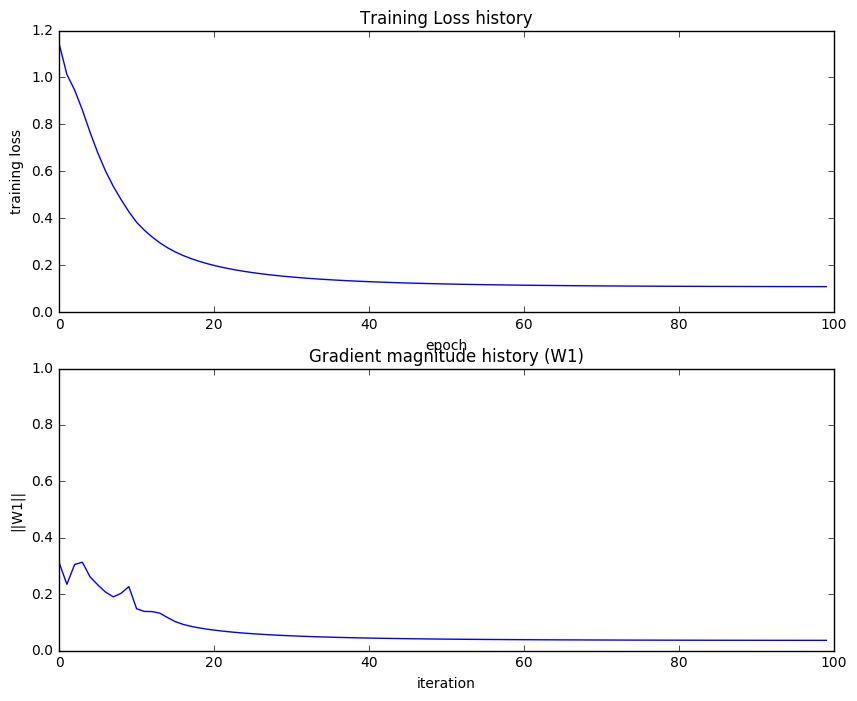

In [6]:
net = init_toy_model('sigmoid', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.5, reg=1e-5,
                  num_epochs=100, verbose=False)

sigmoidloss = stats['loss_history'][-1]
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history and gradient magnitudes
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.ylim(0,1)
plt.title('Gradient magnitude history (W1)')
plt.show()

$$$$

### Q5.4 Using softplus activation
In practice, the Rectified Linear Unit (ReLU) and softplus activations are much more successful than sigmoid. In particular, they don't suffer from the saturation problem. 
Now please look at method `TwoLayerMLP.loss`, where we have provided partial implementations for the forward and backward computation for the ReLU activation. 

- Complete the implementation for the **softplus** activation.
- Train the network with softplus, and report your final training loss (see below).

Note: an implementation of the softplus function for scalar inputs was given in problem 1, but here you need to implement a **numerically stable**, and **vectorized** version. 

We do the numerical checks as usual.

In [7]:
net = init_toy_model('softplus', std=1e-1)
scores = net.loss(X)
print('(1) Your scores:')
print(scores)
print()
correct_scores = np.asarray([[-0.77980255, -1.38043532, -0.8706494 ],
                             [-0.19887433, -1.22677463, -0.59603118],
                             [-0.39705994, -1.06544023, -0.91229474],
                             [-0.09768135, -0.58642231, -0.63485595],
                             [-0.03301159, -0.34776212, -0.4272356 ]])

# The difference should be very small (< 1e-7)
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))
print()

loss, grads = net.loss(X, y, reg=0.1)
correct_loss = 1.320973

# The difference should be very small (< 1e-7)
print('(2) Your loss: %f'%(loss))
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))
print()
    
# The differences should all be very small
print('(3) checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

(1) Your scores:
[[-0.77980255 -1.38043532 -0.8706494 ]
 [-0.19887433 -1.22677463 -0.59603118]
 [-0.39705994 -1.06544023 -0.91229474]
 [-0.09768135 -0.58642231 -0.63485595]
 [-0.03301159 -0.34776212 -0.4272356 ]]

Difference between your scores and correct scores:
3.79776474504e-08

(2) Your loss: 1.320973
Difference between your loss and correct loss:
6.68756627853e-08

(3) checking gradients
b2 max relative error: 6.407388e-11
W2 max relative error: 3.978846e-09
b1 max relative error: 7.482736e-09
W1 max relative error: 5.725849e-09


Now that it's working, let's train the network. Is the neural net able to get stronger learning signals (i.e. gradients) this time? Report your final training loss; it should be better than what you get with sigmoid. 

You're welcome to try ReLU as well. Should the results be similar to using softplus, or not? Are they actually similar?

Final training loss:  0.0187533015945


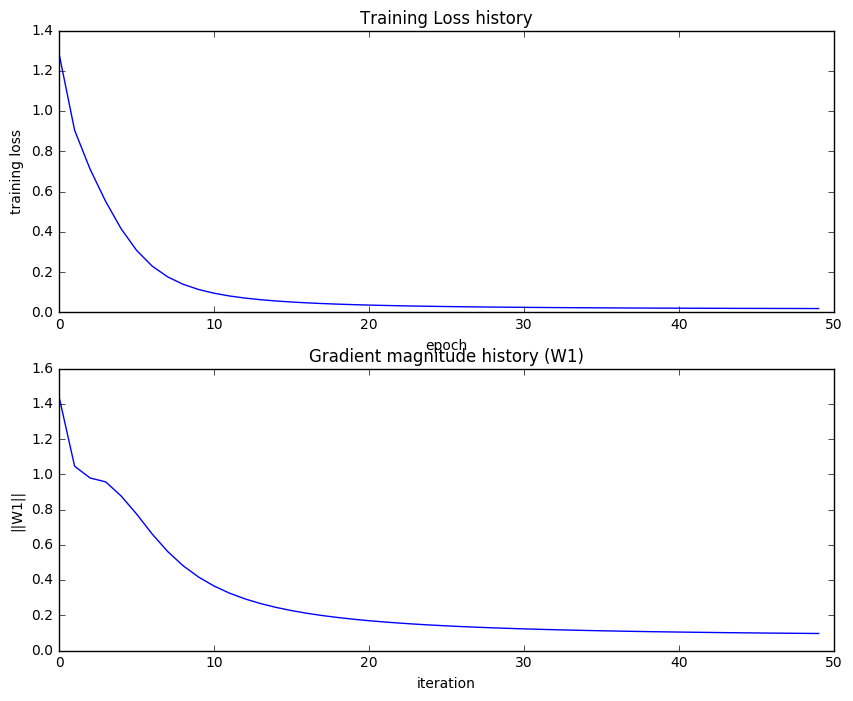

In [8]:
net = init_toy_model('softplus', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

softplusloss = stats['loss_history'][-1]
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.title('Gradient magnitude history (W1)')
plt.show()

### Using relu

(1) Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

(2) Your loss: 1.303788

(3) checking gradients
b2 max relative error: 3.865039e-11
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738423e-09
W1 max relative error: 3.669858e-09

Final training loss:  0.017856220487


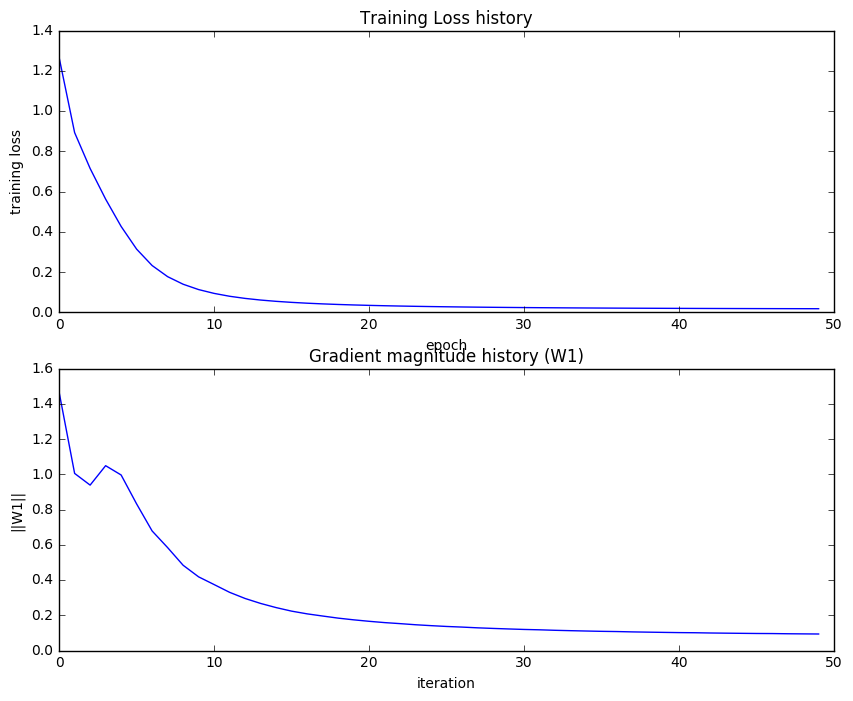

In [9]:
net = init_toy_model('relu', std=1e-1)
scores = net.loss(X)
print('(1) Your scores:')
print(scores)
print()
loss, grads = net.loss(X, y, reg=0.1)
print('(2) Your loss: %f'%(loss))
print()
    
# The differences should all be very small
print('(3) checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

print()
net = init_toy_model('relu', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

reluloss = stats['loss_history'][-1]
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.title('Gradient magnitude history (W1)')
plt.show()

### Using tanh activation

(1) Your scores:
[[-0.38650947 -0.1785075   0.02196263]
 [-0.1540619   0.01237351  0.11578683]
 [ 0.01560209 -0.00569659  0.09850859]
 [-0.01685966  0.04021523  0.09946664]
 [ 0.07829672  0.13004069  0.19600138]]

(2) Your loss: 1.154860

(3) checking gradients
b2 max relative error: 2.125170e-10
W2 max relative error: 2.405888e-09
b1 max relative error: 1.329710e-08
W1 max relative error: 6.165542e-08

Final training loss:  0.237492544862


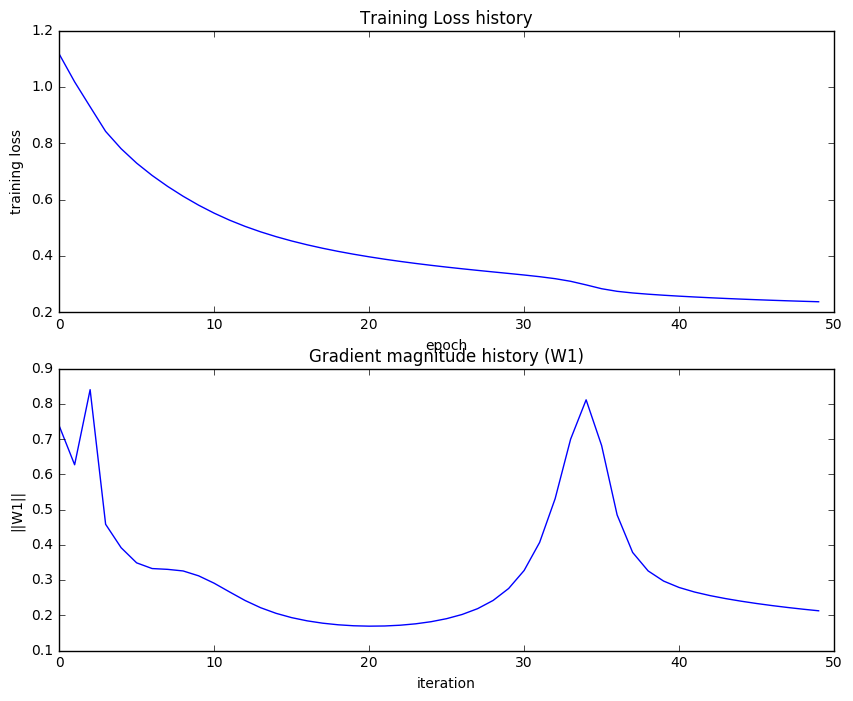

In [10]:
net = init_toy_model('tanh', std=1e-1)
scores = net.loss(X)
print('(1) Your scores:')
print(scores)
print()
loss, grads = net.loss(X, y, reg=0.1)
print('(2) Your loss: %f'%(loss))
print()
    
# The differences should all be very small
print('(3) checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

print()
net = init_toy_model('tanh', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

tanhloss = stats['loss_history'][-1]
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.title('Gradient magnitude history (W1)')
plt.show()

### Using absolute relu

(1) Your scores:
[[-0.97746372 -1.07113299 -0.29871249]
 [-0.1664476  -0.42814602  0.45713588]
 [-0.01973389 -0.2134387   0.31257557]
 [ 0.28089869  0.23870094  0.45648123]
 [ 0.10580326  0.18336613  0.23845096]]

(2) Your loss: 1.199899

(3) checking gradients
b2 max relative error: 1.015749e-10
W2 max relative error: 2.203733e-10
b1 max relative error: 2.031098e-09
W1 max relative error: 5.249029e-10

Final training loss:  0.00977536975693


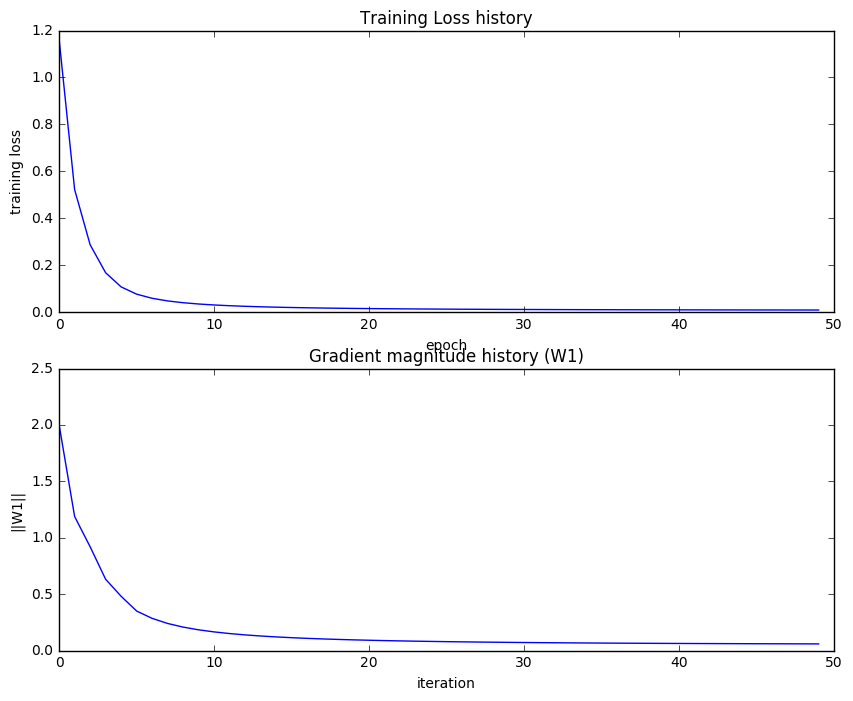

In [11]:
net = init_toy_model('absrelu', std=1e-1)
scores = net.loss(X)
print('(1) Your scores:')
print(scores)
print()
loss, grads = net.loss(X, y, reg=0.1)
print('(2) Your loss: %f'%(loss))
print()
    
# The differences should all be very small
print('(3) checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

print()
net = init_toy_model('absrelu', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

absreluloss = stats['loss_history'][-1]
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.title('Gradient magnitude history (W1)')
plt.show()

### Using leaky relu

(1) Your scores:
[[-0.97746372 -1.07113299 -0.29871249]
 [-0.1664476  -0.42814602  0.45713588]
 [-0.01973389 -0.2134387   0.31257557]
 [ 0.28089869  0.23870094  0.45648123]
 [ 0.10580326  0.18336613  0.23845096]]

(2) Your loss: 1.199899

(3) checking gradients
b2 max relative error: 1.015749e-10
W2 max relative error: 2.203733e-10
b1 max relative error: 2.031098e-09
W1 max relative error: 5.249029e-10

Final training loss:  0.00977536975693


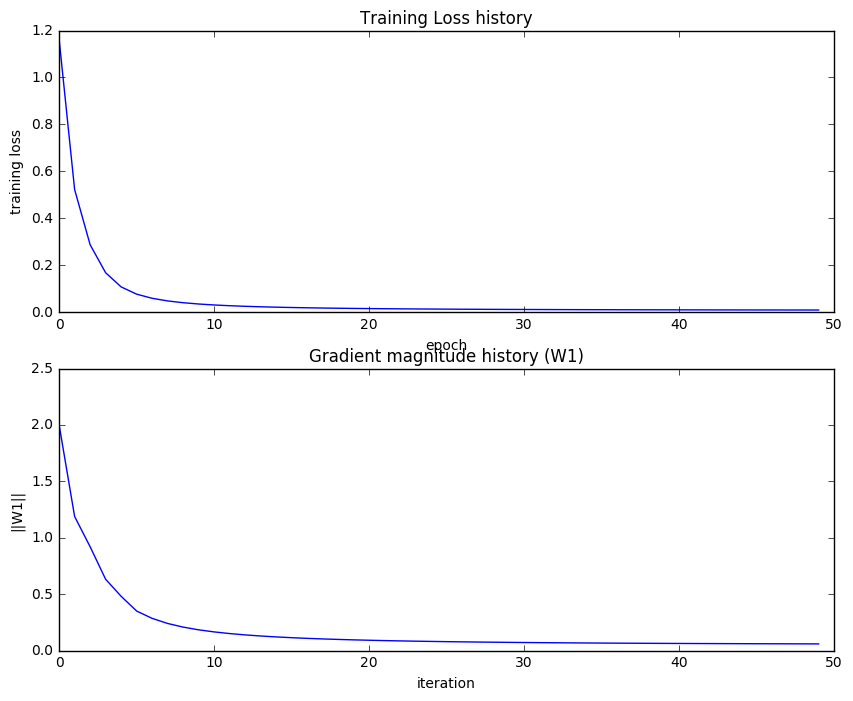

In [12]:
net = init_toy_model('leakyrelu', std=1e-1)
scores = net.loss(X)
print('(1) Your scores:')
print(scores)
print()
loss, grads = net.loss(X, y, reg=0.1)
print('(2) Your loss: %f'%(loss))
print()
    
# The differences should all be very small
print('(3) checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

print()
net = init_toy_model('leakyrelu', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

leakyreluloss = stats['loss_history'][-1]
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.title('Gradient magnitude history (W1)')
plt.show()

In [13]:
print('sigmoid loss is:',sigmoidloss)
print('softplus loss is:',softplusloss)
print('relu loss is:',reluloss)
print('tanh loss is:',tanhloss)
print('absolute relu loss is:',absreluloss)
print('leaky relu loss is:',leakyreluloss)

sigmoid loss is: 0.109267946107
softplus loss is: 0.0187533015945
relu loss is: 0.017856220487
tanh loss is: 0.237492544862
absolute relu loss is: 0.00977536975693
leaky relu loss is: 0.00977536975693


Tanh gets the strongest signal, and softplus isn't far behind, but the final weights three relu finctions achieved are all very low.

For this toy data set, absolute relu and leaky relu achieved better final loss than other activation functions, and relu did pretty good too.

$$$$

$$$$

## Load MNIST data
Now that you have implemented a two-layer network that works on toy data, let's try some real data. The MNIST dataset is a standard benchmark in machine learning. It consists of 70,000 grayscale handwritten digit images, which we split into 50,000 training, 10,000 validation and 10,000 testing. The images are of size 28x28, which are flattened into 784-d vectors.

**Note**: the function `get_MNIST_data` requires the `scikit-learn` package. If you previously did anaconda installation to set up your Python environment, you should already have it. Otherwise, you can install it following the instructions here: http://scikit-learn.org/stable/install.html

In [14]:
# load MNIST
from cs591s2.utils.data_utils import get_MNIST_data
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


### Q5.5 Train a network on MNIST
We will now train a network on MNIST with 64 hidden units in the hidden layer. We train it using SGD, and decrease the learning rate with an exponential rate over time; this is achieved by multiplying the learning rate with a constant factor `learning_rate_decay` (which is less than 1) after each epoch. In effect, we are using a high learning rate initially, which is good for exploring the solution space, and using lower learning rates later to encourage convergence to a local minimum (or [saddle point](http://www.offconvex.org/2016/03/22/saddlepoints/), which may happen more often).

- Train your MNIST network with 3 different activation functions: sigmoid, softplus, and ReLU. Compare their performances.
- Which activation function would you choose in practice? Why?

We first define some variables and utility functions. The `plot_stats` function plots the hisotories of gradient magnitude, training loss, and accuracies on the training and validation sets. The `visualize_weights` function visualizes the weights learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. Both functions help you to diagnose the training process.

In [15]:
input_size = 28 * 28
hidden_size = 64
num_classes = 10

# Plot the loss function and train / validation accuracies
def plot_stats(stats):
    plt.subplot(3, 1, 1)
    plt.plot(stats['grad_magnitude_history'])
    plt.title('Gradient magnitude history (W1)')
    plt.xlabel('Iteration')
    plt.ylabel('||W1||')
    plt.ylim(0, np.minimum(100,np.max(stats['grad_magnitude_history'])))
    plt.subplot(3, 1, 2)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.ylim(0, 100)
    plt.subplot(3, 1, 3)
    plt.plot(stats['train_acc_history'], label='train') 
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()

# Visualize the weights of the network
from cs591s2.utils.vis_utils import visualize_grid
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(-1, 28, 28)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

### Q5.5.1 Sigmoid

In [16]:
sigmoid_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='sigmoid', std=1e-1)

# Train the network
sigmoid_stats = sigmoid_net.train(X_train, y_train, X_val, y_val,
                                  num_epochs=20, batch_size=100,
                                  learning_rate=1e-3, 
                                  learning_rate_decay=0.95,
                                  reg=0.5, verbose=True)
print()

# Predict on the training set
train_acc = (sigmoid_net.predict(X_train) == y_train).mean()
print('Sigmoid final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (sigmoid_net.predict(X_val) == y_val).mean()
print('Sigmoid final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (sigmoid_net.predict(X_test) == y_test).mean()
print('Sigmoid test accuracy: ', test_acc)
sigmoidacc = test_acc

G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: RuntimeWarning: overflow encountered in exp


Epoch 1: loss 78.980750, train_acc 0.280000, val_acc 0.258300
Epoch 2: loss 49.838630, train_acc 0.430000, val_acc 0.459300
Epoch 3: loss 32.431795, train_acc 0.540000, val_acc 0.563200
Epoch 4: loss 21.732892, train_acc 0.710000, val_acc 0.640700
Epoch 5: loss 15.111877, train_acc 0.730000, val_acc 0.688400
Epoch 6: loss 10.906376, train_acc 0.680000, val_acc 0.718700
Epoch 7: loss 8.077669, train_acc 0.740000, val_acc 0.746200
Epoch 8: loss 6.229287, train_acc 0.760000, val_acc 0.766000
Epoch 9: loss 4.979639, train_acc 0.760000, val_acc 0.777300
Epoch 10: loss 4.108814, train_acc 0.780000, val_acc 0.791700
Epoch 11: loss 3.480617, train_acc 0.850000, val_acc 0.802500
Epoch 12: loss 3.065671, train_acc 0.800000, val_acc 0.816400
Epoch 13: loss 2.673266, train_acc 0.870000, val_acc 0.828100
Epoch 14: loss 2.496009, train_acc 0.880000, val_acc 0.837300
Epoch 15: loss 2.355747, train_acc 0.790000, val_acc 0.845900
Epoch 16: loss 2.138493, train_acc 0.840000, val_acc 0.852900
Epoch 17: l

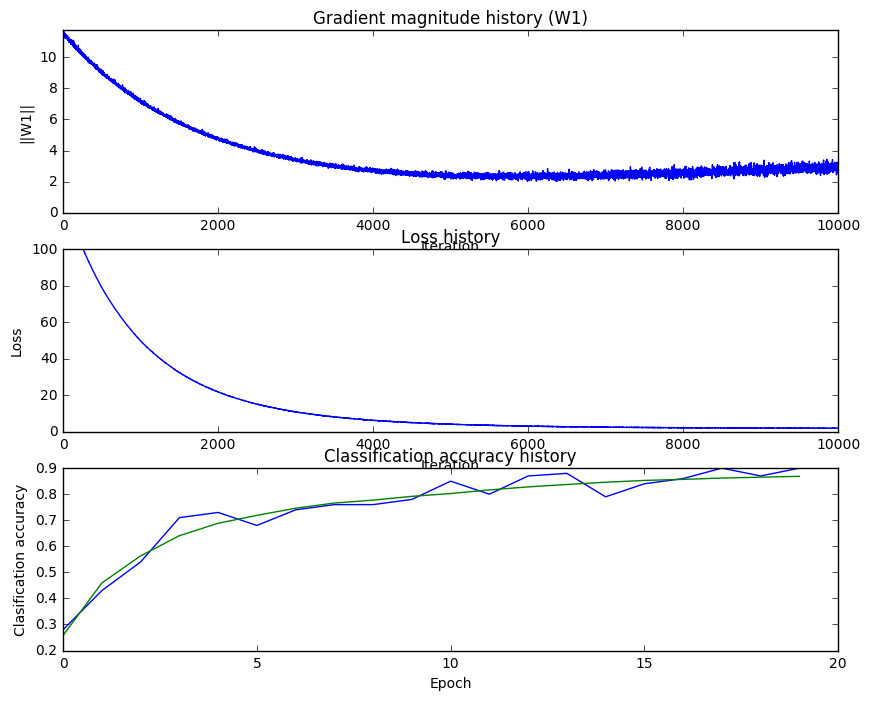

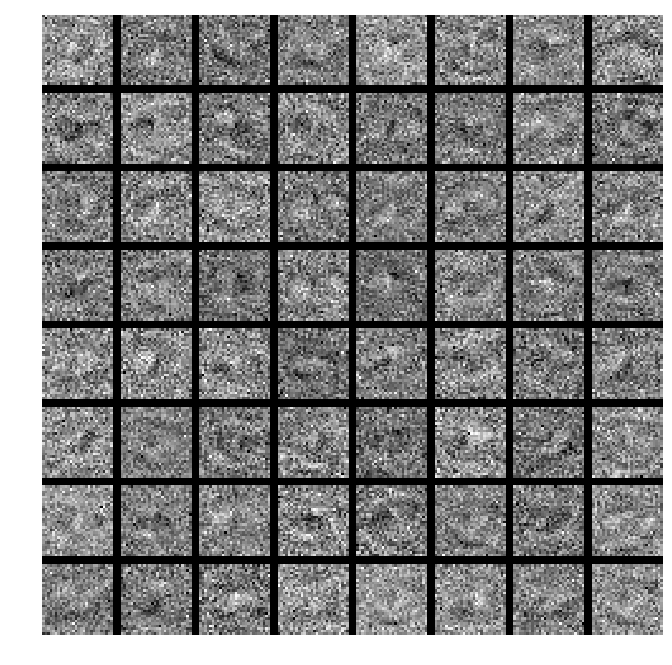

In [17]:
# show stats and visualizations
plot_stats(sigmoid_stats)
show_net_weights(sigmoid_net)

### Q5.5.2 Softplus

Note: **Be careful with potential numerical overflow in your softplus implementation!** The toy example may not have exposed that.

In [18]:
softplus_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='softplus', std=1e-1)

# Train the network
softplus_stats = softplus_net.train(X_train, y_train, X_val, y_val,
                                    num_epochs=20, batch_size=100, 
                                    learning_rate=1e-3, 
                                    learning_rate_decay=0.95,
                                    reg=0.5, verbose=True)
print()

# Predict on the training set
train_acc = (softplus_net.predict(X_train) == y_train).mean()
print('Softplus final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (softplus_net.predict(X_val) == y_val).mean()
print('Softplus final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (softplus_net.predict(X_test) == y_test).mean()
print('Softplus test accuracy: ', test_acc)
softplusacc = test_acc

G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: divide by zero encountered in log
G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: invalid value encountered in multiply


Epoch 1: loss 76.487506, train_acc 0.980000, val_acc 0.842200
Epoch 2: loss 47.411394, train_acc 0.960000, val_acc 0.832900
Epoch 3: loss 30.153274, train_acc 0.740000, val_acc 0.869100
Epoch 4: loss 19.387682, train_acc 0.960000, val_acc 0.873300
Epoch 5: loss 13.032613, train_acc 0.950000, val_acc 0.904400
Epoch 6: loss 8.871954, train_acc 0.940000, val_acc 0.921300
Epoch 7: loss 6.335589, train_acc 0.920000, val_acc 0.928100
Epoch 8: loss 4.404582, train_acc 0.980000, val_acc 0.938300
Epoch 9: loss 3.210811, train_acc 0.960000, val_acc 0.944900
Epoch 10: loss 2.422612, train_acc 0.950000, val_acc 0.949500
Epoch 11: loss 1.822641, train_acc 0.980000, val_acc 0.952700
Epoch 12: loss 1.408602, train_acc 0.990000, val_acc 0.956500
Epoch 13: loss 1.120165, train_acc 0.980000, val_acc 0.958400
Epoch 14: loss 0.993300, train_acc 0.960000, val_acc 0.960000
Epoch 15: loss 0.844330, train_acc 0.940000, val_acc 0.961600
Epoch 16: loss 0.711347, train_acc 0.970000, val_acc 0.962400
Epoch 17: lo

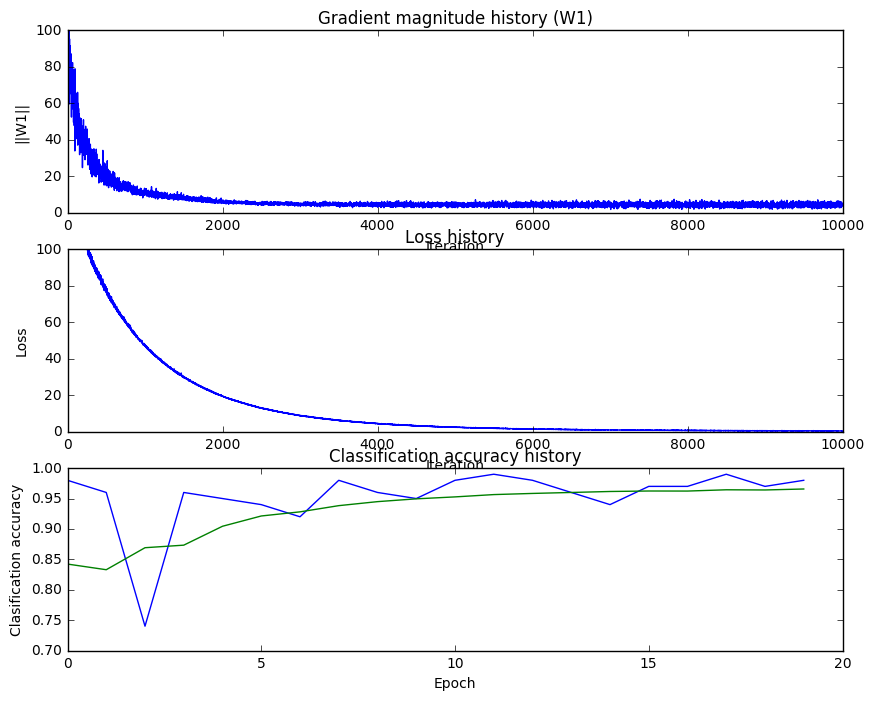

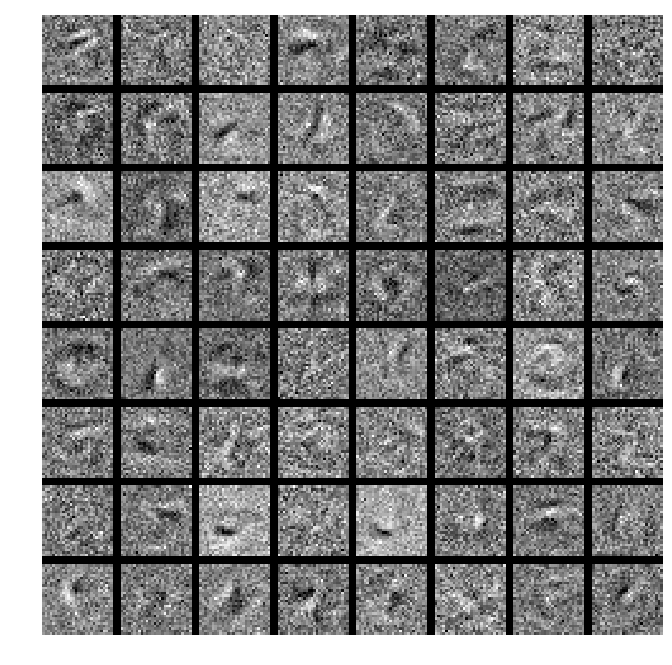

In [19]:
# show stats and visualizations
plot_stats(softplus_stats)
show_net_weights(softplus_net)

### Q5.5.3 ReLU

In [20]:
relu_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='relu', std=1e-1)

# Train the network
relu_stats = relu_net.train(X_train, y_train, X_val, y_val,
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, 
                            learning_rate_decay=0.95,
                            reg=0.5, verbose=True)
print

# Predict on the training set
train_acc = (relu_net.predict(X_train) == y_train).mean()
print('ReLU final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (relu_net.predict(X_val) == y_val).mean()
print('ReLU final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (relu_net.predict(X_test) == y_test).mean()
print('ReLU test accuracy: ', test_acc)
reluacc = test_acc

G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: divide by zero encountered in log
G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: invalid value encountered in multiply


Epoch 1: loss 76.157626, train_acc 0.920000, val_acc 0.859900
Epoch 2: loss 46.895287, train_acc 0.950000, val_acc 0.887000
Epoch 3: loss 29.963015, train_acc 0.940000, val_acc 0.891600
Epoch 4: loss 19.381214, train_acc 0.970000, val_acc 0.915800
Epoch 5: loss 13.072714, train_acc 0.940000, val_acc 0.927300
Epoch 6: loss 8.889458, train_acc 0.970000, val_acc 0.935300
Epoch 7: loss 6.326413, train_acc 0.940000, val_acc 0.940100
Epoch 8: loss 4.408841, train_acc 0.980000, val_acc 0.947800
Epoch 9: loss 3.229752, train_acc 0.990000, val_acc 0.952300
Epoch 10: loss 2.441726, train_acc 0.950000, val_acc 0.955200
Epoch 11: loss 1.817702, train_acc 0.980000, val_acc 0.957500
Epoch 12: loss 1.411017, train_acc 0.990000, val_acc 0.959300
Epoch 13: loss 1.120682, train_acc 1.000000, val_acc 0.959900
Epoch 14: loss 0.994560, train_acc 0.970000, val_acc 0.962200
Epoch 15: loss 0.823467, train_acc 0.950000, val_acc 0.963900
Epoch 16: loss 0.714444, train_acc 0.970000, val_acc 0.963900
Epoch 17: lo

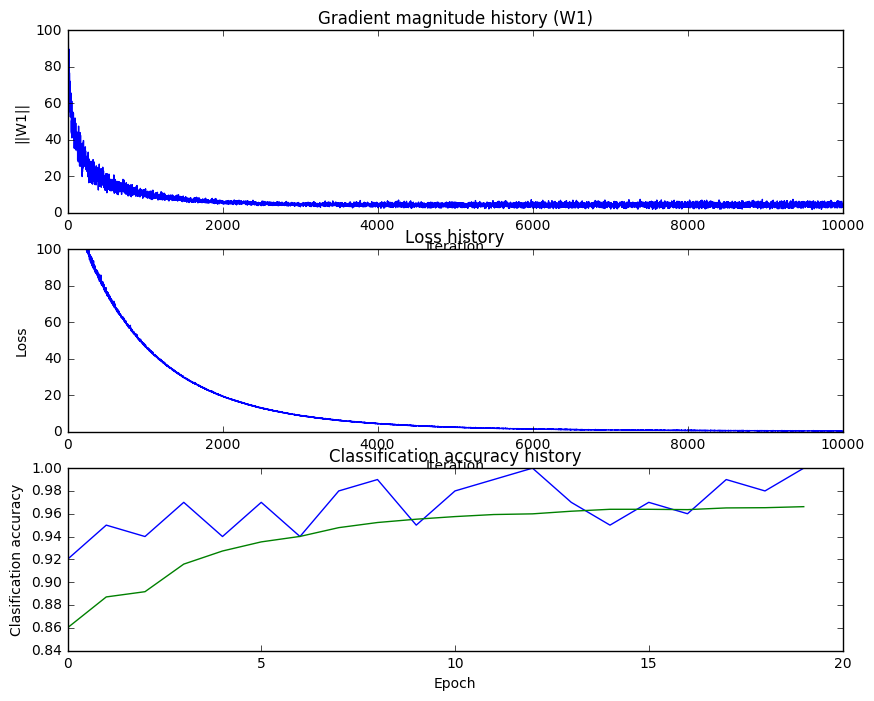

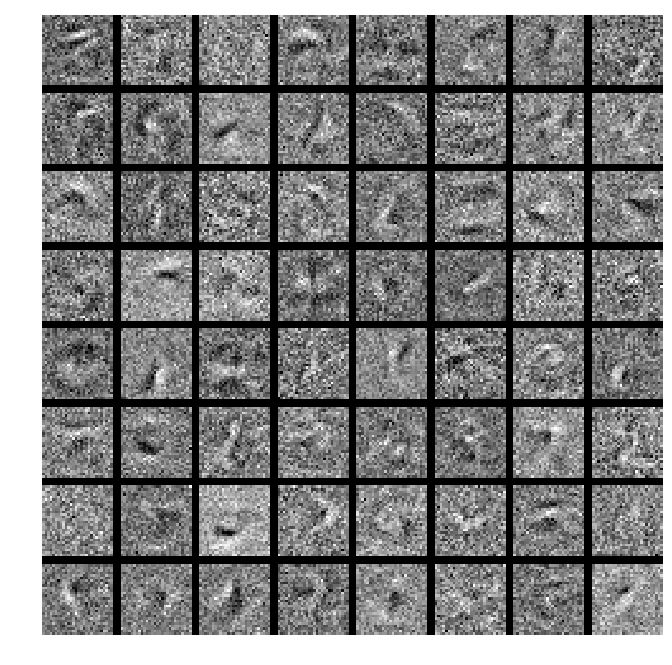

In [21]:
# show stats and visualizations
plot_stats(relu_stats)
show_net_weights(relu_net)

### Q5.5.4 Using tanh

In [22]:
tanh_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='tanh', std=1e-1)

# Train the network
tanh_stats = tanh_net.train(X_train, y_train, X_val, y_val,
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, 
                            learning_rate_decay=0.95,
                            reg=0.5, verbose=True)
print()

# Predict on the training set
train_acc = (tanh_net.predict(X_train) == y_train).mean()
print('tanh final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (tanh_net.predict(X_val) == y_val).mean()
print('tanh final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (tanh_net.predict(X_test) == y_test).mean()
print('tanh test accuracy: ', test_acc)
tanhacc = test_acc

Epoch 1: loss 78.979303, train_acc 0.100000, val_acc 0.111200
Epoch 2: loss 49.979709, train_acc 0.070000, val_acc 0.111200
Epoch 3: loss 32.658778, train_acc 0.090000, val_acc 0.111200
Epoch 4: loss 22.072991, train_acc 0.120000, val_acc 0.111200
Epoch 5: loss 14.966873, train_acc 0.620000, val_acc 0.100500
Epoch 6: loss 10.626424, train_acc 0.650000, val_acc 0.690200
Epoch 7: loss 7.660978, train_acc 0.740000, val_acc 0.754600
Epoch 8: loss 5.742097, train_acc 0.840000, val_acc 0.796900
Epoch 9: loss 4.494309, train_acc 0.770000, val_acc 0.830200
Epoch 10: loss 3.562257, train_acc 0.840000, val_acc 0.851500
Epoch 11: loss 2.845445, train_acc 0.950000, val_acc 0.866600
Epoch 12: loss 2.477647, train_acc 0.940000, val_acc 0.879300
Epoch 13: loss 2.068127, train_acc 0.920000, val_acc 0.884400
Epoch 14: loss 1.891955, train_acc 0.890000, val_acc 0.889200
Epoch 15: loss 1.777324, train_acc 0.870000, val_acc 0.893400
Epoch 16: loss 1.541689, train_acc 0.930000, val_acc 0.896300
Epoch 17: l

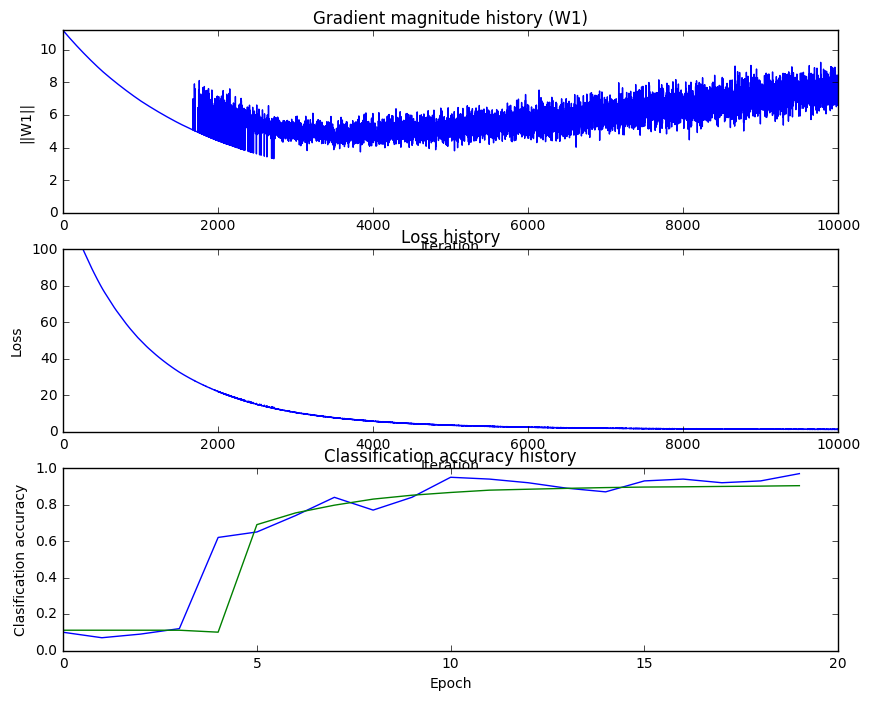

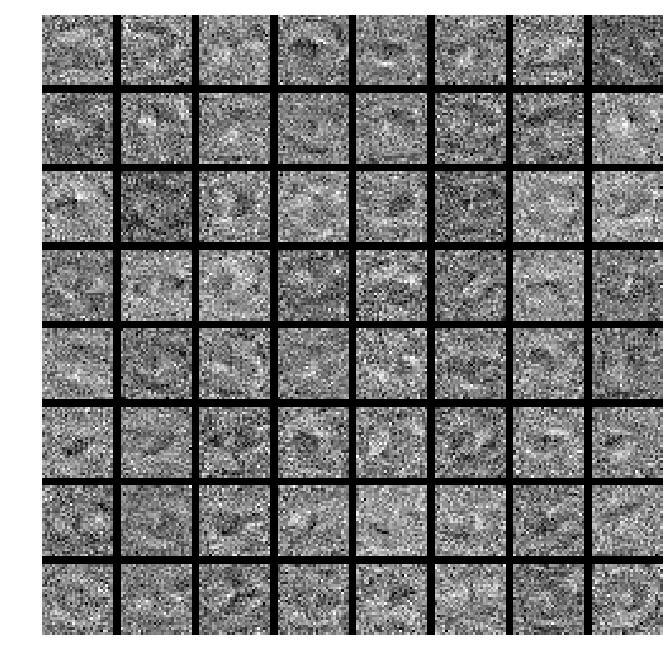

In [23]:
# show stats and visualizations
plot_stats(tanh_stats)
show_net_weights(tanh_net)

### Q5.5.5 absolute relu

In [24]:
absrelu_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='absrelu', std=1e-1)

# Train the network
absrelu_stats = absrelu_net.train(X_train, y_train, X_val, y_val,
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, 
                            learning_rate_decay=0.95,
                            reg=0.5, verbose=True)
print()

# Predict on the training set
train_acc = (absrelu_net.predict(X_train) == y_train).mean()
print('absolute relu final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (absrelu_net.predict(X_val) == y_val).mean()
print('absolute relu final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (absrelu_net.predict(X_test) == y_test).mean()
print('absolute relu test accuracy: ', test_acc)
absreluacc = test_acc

G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: divide by zero encountered in log
G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: invalid value encountered in multiply


Epoch 1: loss 76.487506, train_acc 0.980000, val_acc 0.842200
Epoch 2: loss 47.411394, train_acc 0.960000, val_acc 0.832900
Epoch 3: loss 30.092219, train_acc 0.940000, val_acc 0.856500
Epoch 4: loss 19.320957, train_acc 0.980000, val_acc 0.871100
Epoch 5: loss 13.060638, train_acc 0.950000, val_acc 0.895500
Epoch 6: loss 8.917408, train_acc 0.930000, val_acc 0.902100
Epoch 7: loss 6.474486, train_acc 0.920000, val_acc 0.900500
Epoch 8: loss 4.444550, train_acc 0.930000, val_acc 0.905200
Epoch 9: loss 3.345924, train_acc 0.910000, val_acc 0.910400
Epoch 10: loss 2.480707, train_acc 0.930000, val_acc 0.913600
Epoch 11: loss 1.848631, train_acc 0.960000, val_acc 0.914500
Epoch 12: loss 1.480064, train_acc 0.940000, val_acc 0.915300
Epoch 13: loss 1.197916, train_acc 0.940000, val_acc 0.914800
Epoch 14: loss 1.082728, train_acc 0.940000, val_acc 0.914900
Epoch 15: loss 1.024247, train_acc 0.920000, val_acc 0.916100
Epoch 16: loss 0.774052, train_acc 0.940000, val_acc 0.913900
Epoch 17: lo

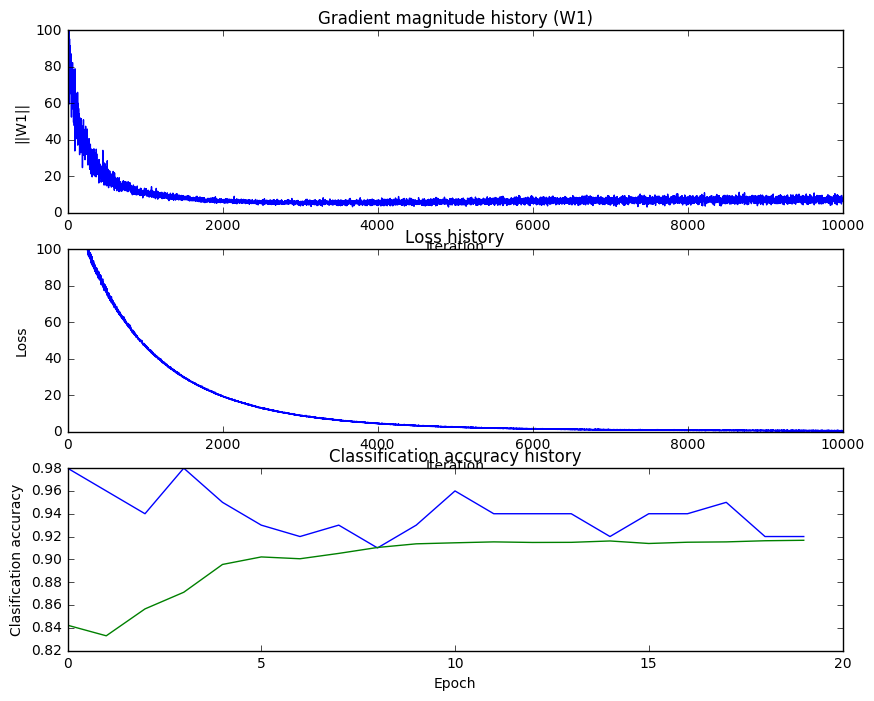

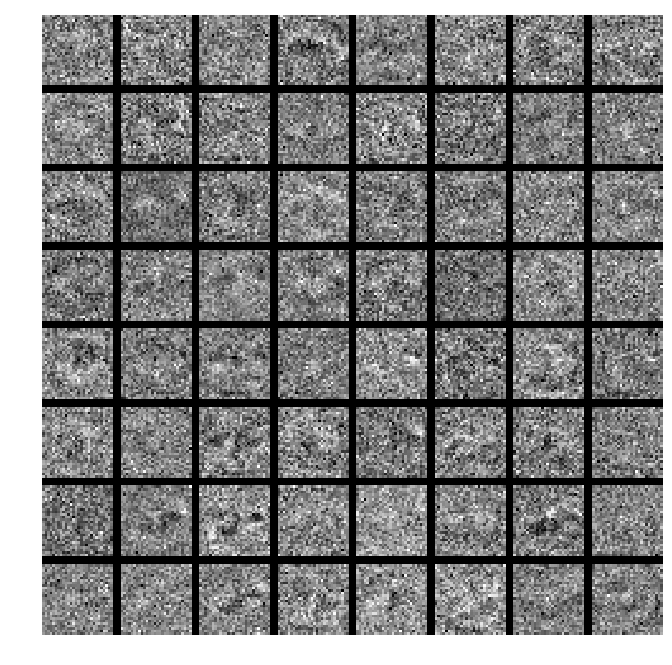

In [25]:
# show stats and visualizations
plot_stats(absrelu_stats)
show_net_weights(absrelu_net)

### Q5.5.6  Using leaky relu

In [26]:
leakyrelu_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='leakyrelu', std=1e-1)

# Train the network
leakyrelu_stats = leakyrelu_net.train(X_train, y_train, X_val, y_val,
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, 
                            learning_rate_decay=0.95,
                            reg=0.5, verbose=True)
print

# Predict on the training set
train_acc = (leakyrelu_net.predict(X_train) == y_train).mean()
print('leaky relu final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (leakyrelu_net.predict(X_val) == y_val).mean()
print('leaky relu final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (leakyrelu_net.predict(X_test) == y_test).mean()
print('leaky relu test accuracy: ', test_acc)
leakyreluacc = test_acc

G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: divide by zero encountered in log
G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: RuntimeWarning: invalid value encountered in multiply


Epoch 1: loss 76.487506, train_acc 0.980000, val_acc 0.842200
Epoch 2: loss 47.411394, train_acc 0.960000, val_acc 0.832900
Epoch 3: loss 30.092219, train_acc 0.940000, val_acc 0.856500
Epoch 4: loss 19.320957, train_acc 0.980000, val_acc 0.871100
Epoch 5: loss 13.060638, train_acc 0.950000, val_acc 0.895500
Epoch 6: loss 8.917408, train_acc 0.930000, val_acc 0.902100
Epoch 7: loss 6.474486, train_acc 0.920000, val_acc 0.900500
Epoch 8: loss 4.444550, train_acc 0.930000, val_acc 0.905200
Epoch 9: loss 3.345924, train_acc 0.910000, val_acc 0.910400
Epoch 10: loss 2.480707, train_acc 0.930000, val_acc 0.913600
Epoch 11: loss 1.848631, train_acc 0.960000, val_acc 0.914500
Epoch 12: loss 1.480064, train_acc 0.940000, val_acc 0.915300
Epoch 13: loss 1.197916, train_acc 0.940000, val_acc 0.914800
Epoch 14: loss 1.082728, train_acc 0.940000, val_acc 0.914900
Epoch 15: loss 1.024247, train_acc 0.920000, val_acc 0.916100
Epoch 16: loss 0.774052, train_acc 0.940000, val_acc 0.913900
Epoch 17: lo

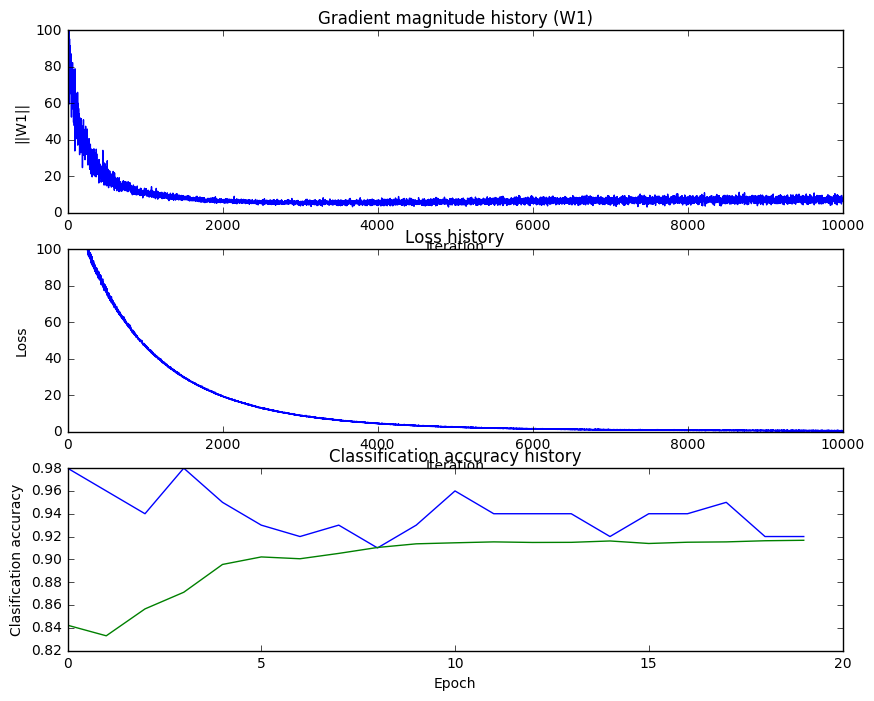

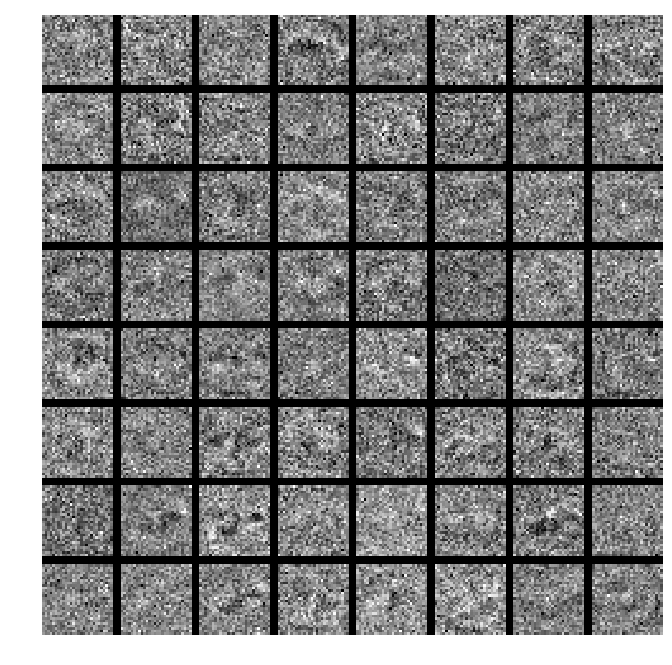

In [27]:
# show stats and visualizations
plot_stats(leakyrelu_stats)
show_net_weights(leakyrelu_net)

In [28]:
print('sigmoid CCR is:',sigmoidacc)
print('softplus CCCR is:',softplusacc)
print('relu CCR is:',reluacc)
print('tanh CCR is:',tanhacc)
print('absolute relu CCR is:',absreluacc)
print('leaky relu CCR is:',leakyreluacc)

sigmoid CCR is: 0.8676
softplus CCCR is: 0.9636
relu CCR is: 0.9638
tanh CCR is: 0.9022
absolute relu CCR is: 0.9165
leaky relu CCR is: 0.9165


$$$$

In [29]:
print('Total time used to run question 5:',time.time()-start,'seconds')

Total time used to run question 5: 79.81850457191467 seconds


In [30]:
# demenstrate overflow of softplus
print('when input of the softplus function is too large, ie 1000, the output is {}, where is should be ~1000'. \
      format(np.log(1+np.exp(1000))))
print('Therefore, I can assume the stable softplus function\'s output equals to the input')
print('For example, if the input is {}, the output of the normal softplus is {}, the output of the stable version is {}, they the same' \
     .format(100, np.log(1+np.exp(100)), 100))

when input of the softplus function is too large, ie 1000, the output is inf, where is should be ~1000
Therefore, I can assume the stable softplus function's output equals to the input
For example, if the input is 100, the output of the normal softplus is 100.0, the output of the stable version is 100, they the same


G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In practice, softplus is not a good choice of activation function, because it has the overflow issue, and it is not empirically differentiable everywhere. 

Sigmoid had the relatively lowest CCR of them all, so I would not use it.

Tanh has higher CCR than sigmoid, but it still has overflow issue, maybe hard tanh is better.

Choosing between three relu functions is hard, and should be consider on a case by case situation, since in the toy data, leaky and absolute relu had better performance, and for MNIST set, relu performed better. Therefore I would use trail and error to determine which relu functions to use.